# Problem Statement

Ames Realty Company has in the past relied heavily on the opinions and expertise of their realtors to manually determine the prices of the homes that they list. However, as the industry moves to automating the appraisal of houses they are ready to join the growing number of real estate companies that uses machine learning to estimate the sale prices of their properties.


**Problem Statement**: As a member of the newly-hired data science team, I will use housing data collected from 2006 to 2010 to create a model that can take in the housing data and return the predicted fair sale price of houses. Model success will be evaluated on the RMSE score.

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [76]:
train = pd.read_csv('./datasets/train.csv')
test = pd.read_csv('./datasets/test.csv')

In [77]:
train.shape

(2051, 81)

# Exploratory Data Analysis

### Create a function to rename columns.

In [78]:
def rename_cols(df):
     df.rename(index=str, columns={
    'PID': 'parcel_id',
    'MS SubClass' : 'ms_subclass',
    'MS Zoning': 'zoning', 
    'Lot Frontage': 'lot_frontage',
    'Lot Area': 'lot_sq_ft',
    'Street': 'paved_street', 
    'Alley': 'alley', 
    'Lot Shape': 'lot_shape', 
    'Land Contour': 'flatness', 
    'Utilities': 'utilities',       
    'Lot Config': 'lot_config', 
    'Land Slope': 'land_slope', 
    'Neighborhood': 'neighborhood', 
    'Condition 1': 'proximity_1',
    'Condition 2': 'proximity_2', 
    'Bldg Type': 'building_type', 
    'House Style': 'style', 
    'Overall Qual': 'quality_rating',
    'Overall Cond': 'condition_rating', 
    'Year Built': 'year_built', 
    'Year Remod/Add': 'year_renovation', 
    'Roof Style': 'roof_style',
    'Roof Matl': 'roof_material', 
    'Exterior 1st': 'exterior_1', 
    'Exterior 2nd': 'exterior_2', 
    'Mas Vnr Type': 'masonry_type',
    'Mas Vnr Area': 'masonry_area', 
    'Exter Qual': 'exterior_quality', 
    'Exter Cond': 'exterior_condition', 
    'Foundation': 'foundation_type', 
    'Bsmt Qual': 'basement_height',
    'Bsmt Cond': 'basement_condition', 
    'Bsmt Exposure': 'basement_exposure', 
    'BsmtFin Type 1': 'basement_finished_condition', 
    'BsmtFin SF 1': 'basement_fin_sqft',
    'BsmtFin Type 2': 'basement_2_condition', 
    'BsmtFin SF 2': 'basement_2_sqft', 
    'Bsmt Unf SF': 'unfinished_basement_sqft', 
    'Total Bsmt SF': 'total_basement_sqft',
    'Heating': 'heating_type', 
    'Heating QC': 'heating_quality', 
    'Central Air': 'has_central_air', 
    'Electrical': 'electrical', 
    '1st Flr SF': 'first_fl_sqft',
    '2nd Flr SF': 'second_fl_sqft', 
    'Low Qual Fin SF': 'low_quality_sqft', 
    'Gr Liv Area': 'living_area_sqft', 
    'Bsmt Full Bath': 'basement_full_bath',
    'Bsmt Half Bath': 'basement_half_bath', 
    'Full Bath': 'full_bath', 
    'Half Bath': 'half_bath', 
    'Bedroom AbvGr': 'bedrooms',
    'Kitchen AbvGr': 'kitchens', 
    'Kitchen Qual': 'kitchen_quality', 
    'TotRms AbvGrd': 'total_rooms(non-bath_or_basement)', 
    'Functional': 'functionality',
    'Fireplaces': 'fireplaces', 
    'Fireplace Qu': 'fireplace_quality', 
    'Garage Type': 'garage_type', 
    'Garage Yr Blt': 'garage_year',
    'Garage Finish': 'garage_finish', 
    'Garage Cars': 'garage_size', 
    'Garage Area': 'garage_sqft', 
    'Garage Qual': 'garage_quality',
    'Garage Cond': 'garage_condition', 
    'Paved Drive': 'has_paved_driveway', 
    'Wood Deck SF': 'deck_sqft', 
    'Open Porch SF': 'open_porch_sqft',
    'Enclosed Porch': 'enclosed_porch_sqft', 
    '3Ssn Porch': 'seasonal_porch_sqft', 
    'Screen Porch': 'screen_porch_sqft', 
    'Pool Area': 'pool_size', 
    'Pool QC': 'pool_quality',
    'Fence': 'fence_quality', 
    'Misc Feature': 'misc_feature',
    'Misc Val': 'misc_value',
    'Mo Sold': 'month_sold', 
    'Yr Sold': 'year_sold', 
    'Sale Type': 'sale_type', 

    
}, inplace=True)
### Idea adapted from https://stackoverflow.com/questions/51208000/how-to-store-a-new-dataframe-after-using-a-self-defined-function-on-it
### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html
### http://jse.amstat.org/v19n3/decock/DataDocumentation.txt

In [79]:
rename_cols(train)

In [80]:
train.head()

,Id,parcel_id,ms_subclass,zoning,lot_frontage,lot_sq_ft,paved_street,alley,lot_shape,flatness,...,screen_porch_sqft,pool_size,pool_quality,fence_quality,misc_feature,misc_value,month_sold,year_sold,sale_type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


### Fill all null values with a for loop

In [81]:
for col in train:
    if type(train[col])== 'int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')
### Adapted from https://pandas.pydata.org/docs/pandas.pdf

In [82]:
train.isnull().sum().sum()

0

##### Creating EDA function

In [1]:
###create a new column where columns are added together and drop originals
###use .map to make bianary observations or make them more understandable.


def EDA(df):
    df['baths'] = df['basement_full_bath'] + df['full_bath'] + (df['basement_half_bath']/2) + (df['half_bath']/2)
    df['finished_basement_sqft'] = df['basement_fin_sqft'] + df['basement_2_sqft']
    df['home_age'] = df['year_sold'] - df['year_built']
        
    df.drop(columns=['basement_full_bath', 'full_bath',
                     'basement_half_bath','half_bath', 
                     'basement_fin_sqft', 'basement_2_sqft', 
                     'first_fl_sqft', 'second_fl_sqft'], inplace=True)
    
    df['basement'] = df['basement_finished_condition'].map({ 
        'Unf': 'unfinished', 'ALQ': 'finished', 'Rec': 'finished', 0 : 'none', 
        'BLQ': 'finished', 'LwQ': 'finished', 'GLQ': 'finished',
    })
    df['paved_street'] = df['paved_street'].map({'Pave': 1, 'Grvl': 0})
    df['has_paved_driveway'] = df['has_paved_driveway'].map({'Y': 1, 'P': 1, 'N': 0})
    df['has_central_air'] = df['has_central_air'].map({'Y': 1, 'N': 0})
    df['newly_renovated'] = df['year_renovation'].map(lambda reno: 1 if reno >= 2010 else 0)
    df['functionality'] = df['functionality'].map({
    'Maj2': 'deducted',
    'Mod': 'deducted',                        
    'Min2':'deducted', 
    'Maj1': 'deducted',
    'Min1': 'deducted',
    'Sev': 'severely_damaged',
    'Sal': 'salvage_only',
    'Typ': 'typical'
    
})
    df['building_type'] = df['building_type'].map({
    '2fmCon': "two_family_conversion",
    'Twnhs' : 'townhouse_inside_unit',
    'TwnhsE': 'townhouse_end_unit',
    '1Fam': 'single_family',
    'Duplex': 'duplex'
})
## adapted from https://pandas.pydata.org/docs/pandas.pdf
## (http://jse.amstat.org/v19n3/decock/DataDocumentation.txt).

In [84]:
EDA(train)

In [85]:
train.head()

,Id,parcel_id,ms_subclass,zoning,lot_frontage,lot_sq_ft,paved_street,alley,lot_shape,flatness,...,misc_value,month_sold,year_sold,sale_type,SalePrice,baths,finished_basement_sqft,home_age,basement,newly_renovated
0,109,533352170,60,RL,0.0,13517,1,0,IR1,Lvl,...,0,3,2010,WD,130500,2.5,533.0,34,finished,0
1,544,531379050,60,RL,43.0,11492,1,0,IR1,Lvl,...,0,4,2009,WD,220000,3.5,637.0,13,finished,0
2,153,535304180,20,RL,68.0,7922,1,0,Reg,Lvl,...,0,1,2010,WD,109000,2.0,731.0,57,finished,0
3,318,916386060,60,RL,73.0,9802,1,0,Reg,Lvl,...,0,4,2010,WD,174000,2.5,0.0,4,unfinished,0
4,255,906425045,50,RL,82.0,14235,1,0,IR1,Lvl,...,0,3,2010,WD,138500,2.0,0.0,110,unfinished,0


In [86]:
train.isnull().sum().sum()

0

Because Polynomial Features will be used for this model, I decided not to get_dummy columns so I create a new list of "good columns" called good_cols

In [87]:
good_cols = ['fireplaces', 'has_central_air','bedrooms', 'quality_rating',
             'lot_sq_ft', 'living_area_sqft','garage_size',
             'finished_basement_sqft', 'home_age','SalePrice']

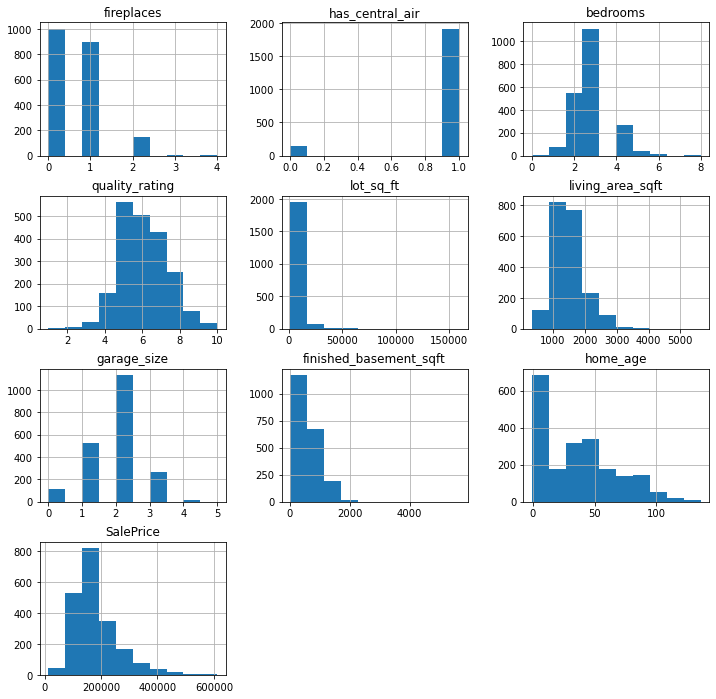

In [88]:
train[good_cols].hist(figsize=(12,12));

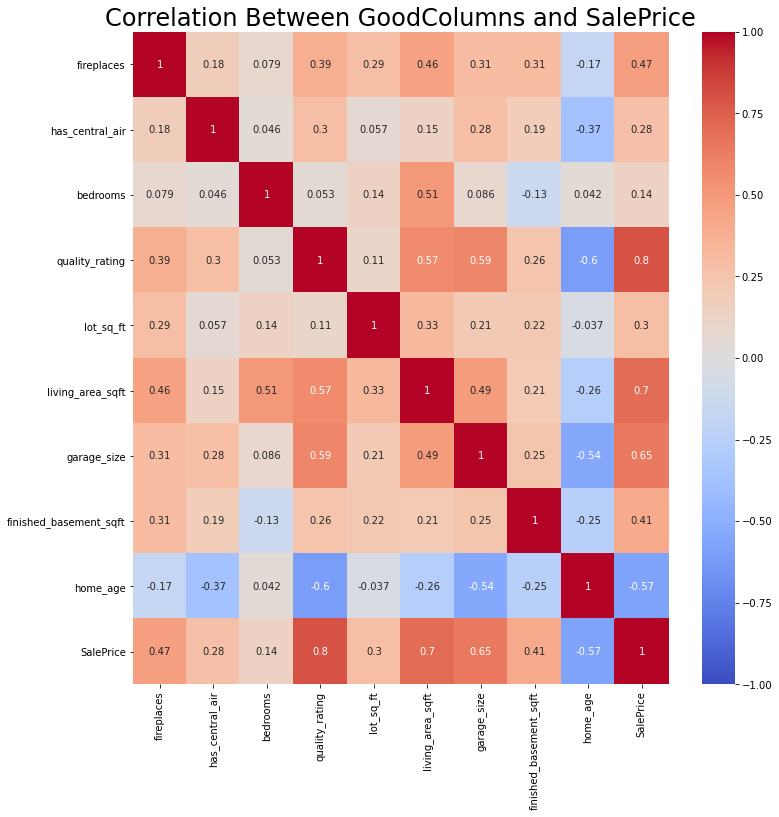

In [129]:
plt.figure(figsize=(12, 12))
sns.heatmap(train[good_cols].corr(),
           annot=True,
           cmap='coolwarm',
           vmin=-1)

plt.title("Correlation Between GoodColumns and SalePrice", fontsize=24);

Highest negative correlation seems to exist between Home Age and SalePrice.Meanwhile, Quality Rating has the highest positive correlation.

In [89]:
features = [col for col in good_cols if col != 'SalePrice']
features

['fireplaces',
 'has_central_air',
 'bedrooms',
 'quality_rating',
 'lot_sq_ft',
 'living_area_sqft',
 'garage_size',
 'finished_basement_sqft',
 'home_age']

In [91]:
### Set features and target

X = train[features]
y = train['SalePrice']

In [92]:
X.head()

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age
0,0,1,3,6,13517,1479,2.0,533.0,34
1,1,1,4,7,11492,2122,2.0,637.0,13
2,0,1,3,5,7922,1057,1.0,731.0,57
3,0,1,3,5,9802,1444,2.0,0.0,4
4,0,1,3,6,14235,1445,2.0,0.0,110


In [93]:
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

# Modeling

### Set Baseline

In [94]:
y.mean()

181469.70160897123

In [95]:
train['SalePrice'].dtype

dtype('int64')

#### Instantiate

In [96]:
poly = PolynomialFeatures(include_bias=False)

In [97]:
### Fit transform X
X_poly = poly.fit_transform(X)
X_poly.shape

(2051, 54)

In [98]:
### Get poly feature names
poly_feat = poly.get_feature_names(features)

In [99]:
### Create a new DataFrame

poly_df = pd.DataFrame(X_poly, columns=poly_feat)
poly_df = poly_df.set_index(train.index)
poly_df.head()

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age,fireplaces^2,...,living_area_sqft^2,living_area_sqft garage_size,living_area_sqft finished_basement_sqft,living_area_sqft home_age,garage_size^2,garage_size finished_basement_sqft,garage_size home_age,finished_basement_sqft^2,finished_basement_sqft home_age,home_age^2
0,0.0,1.0,3.0,6.0,13517.0,1479.0,2.0,533.0,34.0,0.0,...,2187441.0,2958.0,788307.0,50286.0,4.0,1066.0,68.0,284089.0,18122.0,1156.0
1,1.0,1.0,4.0,7.0,11492.0,2122.0,2.0,637.0,13.0,1.0,...,4502884.0,4244.0,1351714.0,27586.0,4.0,1274.0,26.0,405769.0,8281.0,169.0
2,0.0,1.0,3.0,5.0,7922.0,1057.0,1.0,731.0,57.0,0.0,...,1117249.0,1057.0,772667.0,60249.0,1.0,731.0,57.0,534361.0,41667.0,3249.0
3,0.0,1.0,3.0,5.0,9802.0,1444.0,2.0,0.0,4.0,0.0,...,2085136.0,2888.0,0.0,5776.0,4.0,0.0,8.0,0.0,0.0,16.0
4,0.0,1.0,3.0,6.0,14235.0,1445.0,2.0,0.0,110.0,0.0,...,2088025.0,2890.0,0.0,158950.0,4.0,0.0,220.0,0.0,0.0,12100.0


In [100]:
train['SalePrice'] = train['SalePrice'].astype(float)

#### Join y onto the new poly_df

In [101]:
poly_df = poly_df.join(train['SalePrice'])

In [102]:
poly_df.isnull().sum().sort_values(ascending=False).head()

fireplaces                         0
lot_sq_ft garage_size              0
bedrooms garage_size               0
bedrooms finished_basement_sqft    0
bedrooms home_age                  0
dtype: int64

In [103]:
poly_df.head()

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age,fireplaces^2,...,living_area_sqft garage_size,living_area_sqft finished_basement_sqft,living_area_sqft home_age,garage_size^2,garage_size finished_basement_sqft,garage_size home_age,finished_basement_sqft^2,finished_basement_sqft home_age,home_age^2,SalePrice
0,0.0,1.0,3.0,6.0,13517.0,1479.0,2.0,533.0,34.0,0.0,...,2958.0,788307.0,50286.0,4.0,1066.0,68.0,284089.0,18122.0,1156.0,130500.0
1,1.0,1.0,4.0,7.0,11492.0,2122.0,2.0,637.0,13.0,1.0,...,4244.0,1351714.0,27586.0,4.0,1274.0,26.0,405769.0,8281.0,169.0,220000.0
2,0.0,1.0,3.0,5.0,7922.0,1057.0,1.0,731.0,57.0,0.0,...,1057.0,772667.0,60249.0,1.0,731.0,57.0,534361.0,41667.0,3249.0,109000.0
3,0.0,1.0,3.0,5.0,9802.0,1444.0,2.0,0.0,4.0,0.0,...,2888.0,0.0,5776.0,4.0,0.0,8.0,0.0,0.0,16.0,174000.0
4,0.0,1.0,3.0,6.0,14235.0,1445.0,2.0,0.0,110.0,0.0,...,2890.0,0.0,158950.0,4.0,0.0,220.0,0.0,0.0,12100.0,138500.0


#### Check new correlations

<AxesSubplot:>

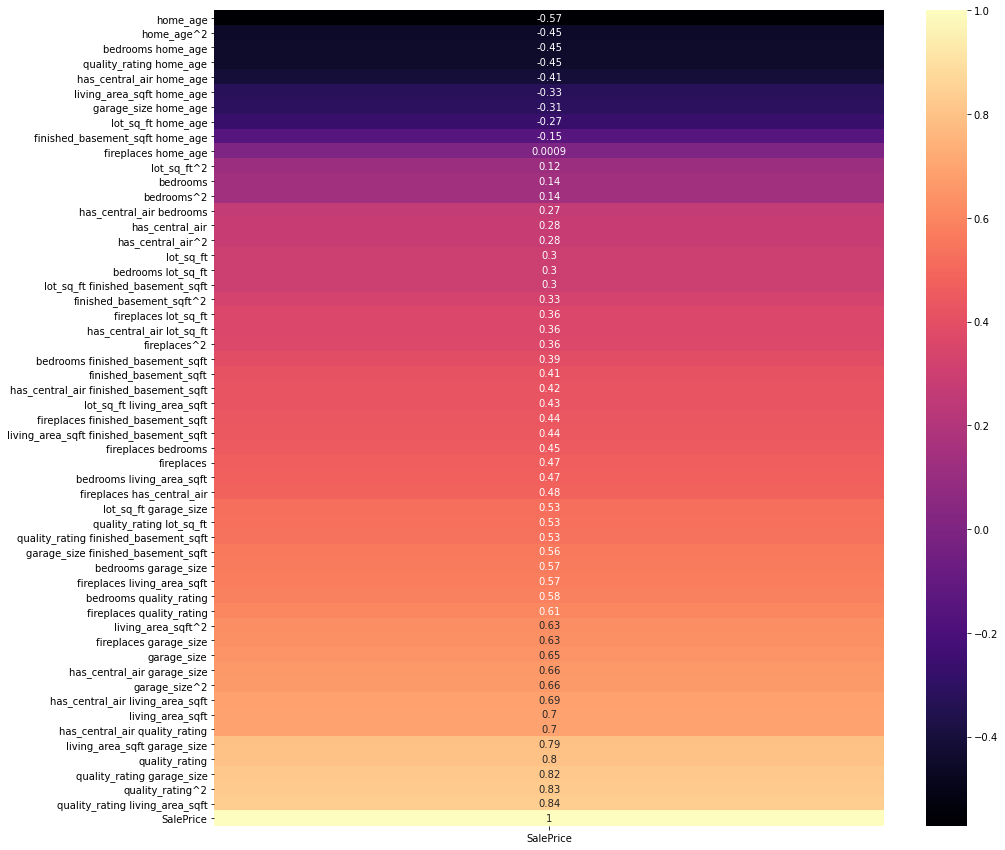

In [104]:
plt.figure(figsize=(15, 15))
sns.heatmap(poly_df.corr()[['SalePrice']].sort_values('SalePrice'), annot=True, cmap='magma')

#### Set new X for the polynomial features.

In [105]:
X = poly_df[poly_feat]

In [106]:
## Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

##### Instantiate Standard Scaler

In [107]:
ss = StandardScaler()

In [108]:
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [109]:
X_train.head()

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age,fireplaces^2,...,living_area_sqft^2,living_area_sqft garage_size,living_area_sqft finished_basement_sqft,living_area_sqft home_age,garage_size^2,garage_size finished_basement_sqft,garage_size home_age,finished_basement_sqft^2,finished_basement_sqft home_age,home_age^2
1247,0.0,1.0,3.0,3.0,10410.0,1214.0,3.0,0.0,91.0,0.0,...,1473796.0,3642.0,0.0,110474.0,9.0,0.0,273.0,0.0,0.0,8281.0
1467,0.0,1.0,3.0,6.0,11660.0,1326.0,2.0,0.0,0.0,0.0,...,1758276.0,2652.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0
493,1.0,1.0,3.0,6.0,5707.0,1242.0,1.0,0.0,74.0,1.0,...,1542564.0,1242.0,0.0,91908.0,1.0,0.0,74.0,0.0,0.0,5476.0
769,0.0,1.0,3.0,5.0,10172.0,874.0,1.0,441.0,38.0,0.0,...,763876.0,874.0,385434.0,33212.0,1.0,441.0,38.0,194481.0,16758.0,1444.0
541,1.0,1.0,1.0,9.0,4538.0,1310.0,2.0,1004.0,7.0,1.0,...,1716100.0,2620.0,1315240.0,9170.0,4.0,2008.0,14.0,1008016.0,7028.0,49.0


 Cross Val Score needs to be used on 3 different models to see which one performs best

#### Instantiate Linear Regression.

In [110]:
lr = LinearRegression()

In [111]:
cross_val_score(lr, X_train_sc, y_train, cv=5).mean()

0.6674128409668401

In [112]:
## Instantiate Ridge
ridge = RidgeCV()

In [113]:
cross_val_score(ridge, X_train_sc, y_train, cv=5).mean()

0.6656865455750126

In [114]:
## Instantiate Lasso
lasso = LassoCV(cv=5)

In [115]:
cross_val_score(lasso, X_train_sc, y_train, cv=5).mean()

0.6387192361676586

LinearRegression model has the best cross val score, I am going to proceed with Lasso because I know I have too many features on my hand

In [116]:
#find optimal alpha.
l_alphas=np.logspace(-3, 1, 100)

lasso = LassoCV(alphas=l_alphas, cv=5)

lasso = lasso.fit(X_train_sc, y_train)

/Users/mondayoshoikpor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158355614492.28467, tolerance: 728353483.5158274
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mondayoshoikpor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8184460236.847412, tolerance: 728353483.5158274
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mondayoshoikpor/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118708531517.32794, tolerance: 712116208.2034009
  model = cd_fast.enet_coordinate_descent_gram(
/Users/mondayoshoikpor/opt

In [117]:
lasso.alpha_

0.001

In [118]:
y_pred_train_lasso = lasso.predict(X_train_sc)
y_pred_train_lasso

array([108922.03248014, 170177.51637316, 119556.37142346, ...,
       118039.97044192, 196914.47901971, 252921.16734233])

In [119]:
y_pred_test_lasso = lasso.predict(X_test_sc)

In [120]:
lasso.score(X_train_sc, y_train)

0.8918994438363689

In [121]:
lasso.score(X_test_sc, y_test)

0.8897151383494206

This R2 score on my training set signifies that 89% of the variability in the SalePrice is explained by the Lasso model compared to the baseline prediction. With R2 scores nearly the same for both model and both close to 1.0, the results tell me that the model has low variance and low bias.

In [122]:
lasso.coef_

array([ -2968.39497896,  11535.4170316 ,   1462.15769657, -17634.12768272,
        18215.63657389,   6068.78853599, -16914.01379787,  -2666.92683794,
       -23898.08362555,  -7216.89523788,   1255.16142413, -19908.32389294,
          993.48691874,   7301.51156895,  39232.96579384,  -8499.10767689,
         1831.26268227,   5925.99319996,  -3407.02313987,  -2562.18599841,
       -23486.26419412,  -6373.23955833,   8938.64111584,  -2434.84646698,
         9768.46875283,  12930.51658057, -16054.38685103, -13814.64261996,
        19735.98768539,  33756.03441383,  -3129.42748456,   8230.42358479,
         8278.94005781,  29031.07062754,  13867.93052457,  43101.29043464,
        29876.18876987,  28218.22425614,  -3702.41050044,  -6734.36142282,
       -45899.01680131,  11309.67630132,  -5240.12911021, -10179.08812467,
       -22274.47407904,   4509.63862085, -44284.65294053, -15400.74794289,
         1441.16741921,   -605.40421317,    534.560203  ,   7585.64776579,
         -763.8646907 ,  

In [123]:
### Test residual
residuals_lasso = y_test - y_pred_test_lasso

residuals_lasso.head()

864      6514.392113
317     -2644.149577
152    -11319.679227
28      23157.436746
1027    -6654.276417
Name: SalePrice, dtype: float64

<AxesSubplot:>

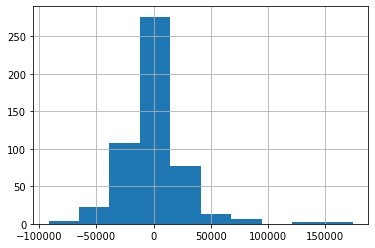

In [124]:
residuals_lasso.hist()

one of the rules of Multiple Linear Regression(MLR) is to have a Residuals that have a fairly normal distribution. I guess I am on the right track as the diagram looks fairly normal

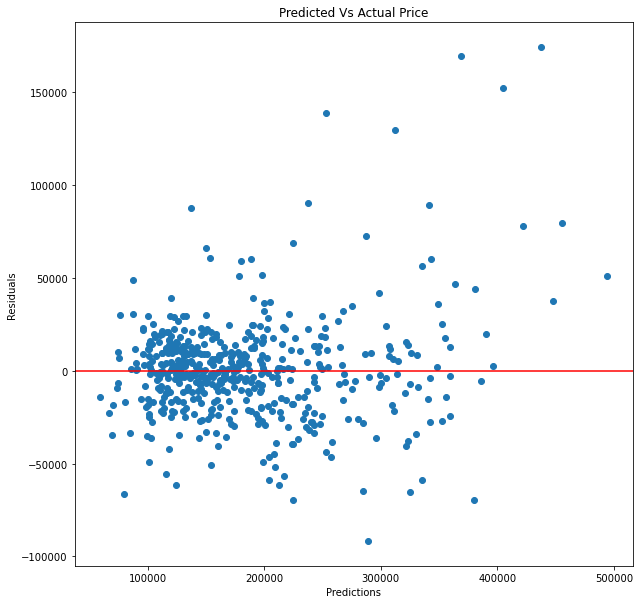

In [125]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred_test_lasso, residuals_lasso)
plt.title("Predicted Vs Actual Price")
plt.xlabel("Predictions")
plt.ylabel("Residuals")

plt.axhline(y=0, color='r', linestyle='-');

In [126]:
rss_lasso = (residuals_lasso**2).sum()

lasso_RMSE = np.sqrt(rss_lasso / len(y_pred_test_lasso))
lasso_RMSE

28143.485123378763

Since my LASSO model did not actually drive down any of my coefficients to 0, I will try Ridge now.

In [50]:
ridge.fit(X_train_sc, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [51]:
ridge.score(X_train_sc, y_train)

0.8885043327660639

In [54]:
ridge.score(X_test_sc, y_test)

0.8941638972061077

In [56]:
y_pred_ridge = ridge.predict(X_test_sc)

In [57]:
residuals_ridge = y_test - y_pred_ridge

residuals_ridge.head()

864      3578.891466
317       796.699842
152    -18837.109270
28      16915.498446
1027    -4805.408846
Name: SalePrice, dtype: float64

<AxesSubplot:>

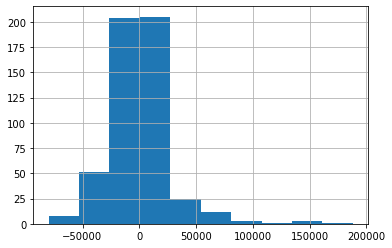

In [58]:
residuals_ridge.hist()

Ridge residuals have a good normal distribution however there a few outliers skewing it to the right.

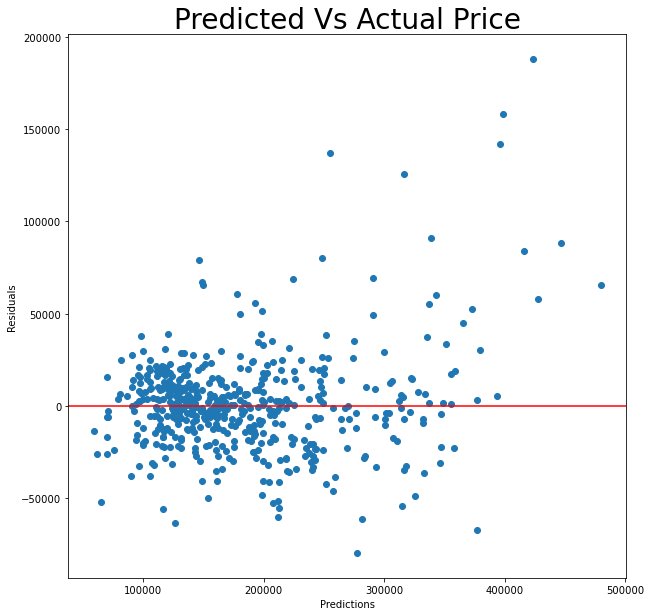

In [59]:
plt.figure(figsize=(10, 10))
plt.scatter(y_pred_ridge, residuals_ridge)
plt.title("Predicted Vs Actual Price", fontsize=28)
plt.xlabel("Predictions")
plt.ylabel("Residuals")

plt.axhline(y=0, color='r', linestyle='-');

There are a few outliers in the top right corner. This tells me that the model is having a harder time predicting the price of some of the most expensive homes. Overall, the errors are somewhat linear and normally distributed.



In [133]:
rss_ridge = (residuals_ridge**2).sum()

len(y_pred_ridge)

ridge_RMSE = np.sqrt(rss_ridge / len(y_pred_ridge))
ridge_RMSE

27570.005024839014

I didn't find any optimal alpha for the ridge model on the first try so since there is still room to improve, I will try that now.

In [127]:
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)
###Cross-validate over our list of ridge alphas.
ridge_model = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_model = ridge_model.fit(X_train_sc, y_train)

In [128]:
ridge_model.alpha_

1353.0477745798062

In [136]:
ridge_model.score(X_train_sc, y_train)

0.820047857223856

In [137]:
ridge_model.score(X_holdout_sc, y_holdout)

0.8361574854722718

I got a worse R2 score after finding the "optimal ridge alpha" so I'll keep the automatically generated one instead.

In [138]:
test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [139]:
rename_cols(test)

In [140]:
for col in train:
    if type(train[col])== 'int64' or 'float64':
        train[col] = train[col].fillna(value=0)
    else:
        train[col] = train[col].fillna(value='None')

In [141]:
EDA(test)

In [142]:
X_test = test[features]
X_test.head()

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age
0,0,0,4,6,9142,1928,1,0,96
1,0,1,6,5,9662,1967,2,0,29
2,1,1,3,7,17104,1496,2,554,0
3,0,1,2,5,8520,968,2,0,84
4,2,1,3,6,9500,1394,2,609,46


In [143]:
X_poly_test = poly.transform(X_test)

In [144]:
poly_df_test = pd.DataFrame(X_poly_test, columns=poly_feat)
poly_df_test = poly_df_test.set_index(test.index)

In [145]:
X_poly_test_sc = ss.transform(X_poly_test)

In [146]:
y_hat = lasso.predict(X_poly_test_sc)
y_hat_ridge = ridge.predict(X_poly_test_sc)

In [147]:
poly_df_test.head()

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age,fireplaces^2,...,living_area_sqft^2,living_area_sqft garage_size,living_area_sqft finished_basement_sqft,living_area_sqft home_age,garage_size^2,garage_size finished_basement_sqft,garage_size home_age,finished_basement_sqft^2,finished_basement_sqft home_age,home_age^2
0,0.0,0.0,4.0,6.0,9142.0,1928.0,1.0,0.0,96.0,0.0,...,3717184.0,1928.0,0.0,185088.0,1.0,0.0,96.0,0.0,0.0,9216.0
1,0.0,1.0,6.0,5.0,9662.0,1967.0,2.0,0.0,29.0,0.0,...,3869089.0,3934.0,0.0,57043.0,4.0,0.0,58.0,0.0,0.0,841.0
2,1.0,1.0,3.0,7.0,17104.0,1496.0,2.0,554.0,0.0,1.0,...,2238016.0,2992.0,828784.0,0.0,4.0,1108.0,0.0,306916.0,0.0,0.0
3,0.0,1.0,2.0,5.0,8520.0,968.0,2.0,0.0,84.0,0.0,...,937024.0,1936.0,0.0,81312.0,4.0,0.0,168.0,0.0,0.0,7056.0
4,2.0,1.0,3.0,6.0,9500.0,1394.0,2.0,609.0,46.0,4.0,...,1943236.0,2788.0,848946.0,64124.0,4.0,1218.0,92.0,370881.0,28014.0,2116.0


In [148]:
pf_submission_df = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_hat   
})
pf_submission_df.head()

,Id,SalePrice
0,2658,127176.797378
1,2718,144930.117356
2,2414,235673.290665
3,1989,105434.887475
4,625,155212.931430


In [150]:
pf_submission_df.to_csv('./datasets/submission4.csv', index=False)

In [151]:
pf_submission2_df = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': y_hat_ridge   
})
pf_submission2_df.head()

,Id,SalePrice
0,2658,126856.075484
1,2718,147200.521993
2,2414,238027.696719
3,1989,102189.429632
4,625,165151.510172


In [153]:
pf_submission2_df.to_csv('./datasets/submission5.csv', index=False) ## kaggle final score 30346.86

### Add residual to the test

In [73]:
X_test['residuals'] = pd.Series.to_frame(residuals_ridge)
X_test.shape

<ipython-input-73-f7d40a4b1266>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['residuals'] = pd.Series.to_frame(residuals_ridge)


(513, 55)

In [74]:
X_test[X_test['residuals'] >= 140000]

,fireplaces,has_central_air,bedrooms,quality_rating,lot_sq_ft,living_area_sqft,garage_size,finished_basement_sqft,home_age,fireplaces^2,...,living_area_sqft garage_size,living_area_sqft finished_basement_sqft,living_area_sqft home_age,garage_size^2,garage_size finished_basement_sqft,garage_size home_age,finished_basement_sqft^2,finished_basement_sqft home_age,home_age^2,residuals
151,1.0,1.0,4.0,9.0,16056.0,2868.0,3.0,240.0,1.0,1.0,...,8604.0,688320.0,2868.0,9.0,720.0,3.0,57600.0,240.0,1.0,158379.960737
1671,2.0,1.0,2.0,9.0,12919.0,2364.0,3.0,2188.0,1.0,4.0,...,7092.0,5172432.0,2364.0,9.0,6564.0,3.0,4787344.0,2188.0,1.0,188196.868870
823,1.0,1.0,4.0,8.0,53504.0,3279.0,3.0,1416.0,7.0,1.0,...,9837.0,4643064.0,22953.0,9.0,4248.0,21.0,2005056.0,9912.0,49.0,142286.539068


In [156]:
train['SalePrice'].sort_values(ascending=False).head(15)

1671    611657.0
1964    591587.0
1692    584500.0
1796    582933.0
151     556581.0
1164    555000.0
623     552000.0
138     545224.0
823     538000.0
1592    535000.0
81      501837.0
800     500067.0
1227    500000.0
1700    485000.0
1158    475000.0
Name: SalePrice, dtype: float64

In [157]:
train[train['SalePrice'] >= 500000].describe()

,Id,parcel_id,ms_subclass,lot_frontage,lot_sq_ft,paved_street,quality_rating,condition_rating,year_built,year_renovation,...,screen_porch_sqft,pool_size,misc_value,month_sold,year_sold,SalePrice,baths,finished_basement_sqft,home_age,newly_renovated
count,13.000000,1.300000e+01,13.000000,13.000000,13.000000,13.0,13.000000,13.0,13.000000,13.000000,...,13.000000,13.0,13.0,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,1121.538462,5.277291e+08,38.461538,83.384615,21450.692308,1.0,9.307692,5.0,2005.076923,2005.692308,...,84.923077,0.0,0.0,5.461538,2008.000000,550337.384615,3.653846,1326.846154,2.923077,0.076923
std,1011.601586,5.005838e+05,20.754981,24.312337,13970.650554,0.0,0.630425,0.0,4.112208,4.049375,...,116.866349,0.0,0.0,2.366974,1.683251,36034.145535,0.515777,803.027900,3.946761,0.277350
min,16.000000,5.272100e+08,20.000000,47.000000,12919.000000,1.0,8.000000,5.0,1993.000000,1994.000000,...,0.000000,0.0,0.0,1.000000,2006.000000,500000.000000,3.000000,0.000000,0.000000,0.000000
25%,367.000000,5.272141e+08,20.000000,60.000000,14836.000000,1.0,9.000000,5.0,2004.000000,2005.000000,...,0.000000,0.0,0.0,4.000000,2006.000000,535000.000000,3.500000,1101.000000,1.000000,0.000000
50%,457.000000,5.281060e+08,20.000000,85.000000,16056.000000,1.0,9.000000,5.0,2006.000000,2006.000000,...,0.000000,0.0,0.0,6.000000,2009.000000,552000.000000,3.500000,1416.000000,1.000000,0.000000
75%,2331.000000,5.281501e+08,60.000000,105.000000,17423.000000,1.0,10.000000,5.0,2008.000000,2008.000000,...,192.000000,0.0,0.0,7.000000,2009.000000,582933.000000,3.500000,1904.000000,5.000000,0.000000
max,2451.000000,5.283600e+08,60.000000,114.000000,53504.000000,1.0,10.000000,5.0,2009.000000,2010.000000,...,322.000000,0.0,0.0,9.000000,2010.000000,611657.000000,4.500000,2306.000000,13.000000,1.000000


In [158]:
train.loc[train['SalePrice'] >= 500000, ['neighborhood']]

,neighborhood
81,StoneBr
138,StoneBr
151,StoneBr
623,NridgHt
800,NridgHt
823,StoneBr
1164,NridgHt
1227,NridgHt
1592,StoneBr
1671,NridgHt


In [159]:
train['neighborhood'].value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
NPkVill     17
Veenker     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: neighborhood, dtype: int64

I found a correlation between high priced homes and neighborhoods, however, since this is a categorical feature, I cannot easitly add it on to my scaled polynomial features.

In [160]:
train.loc[train['SalePrice'] >= 500000, ['pool_quality']]

,pool_quality
81,0
138,0
151,0
623,0
800,0
823,0
1164,0
1227,0
1592,0
1671,0


In [161]:
train.loc[train['SalePrice'] >= 500000, ['misc_value']]

,misc_value
81,0
138,0
151,0
623,0
800,0
823,0
1164,0
1227,0
1592,0
1671,0


I check to see if the numerical features, Pool Quality and/or Misc Value have any correlation to the high priced homes and am very surprised to see none of them have either.

## Conclusions

My model gives credence to generalization. Therefore I am very confident with it. With a high accuracy score that is similar for both the train and test data, I am really happy my organization will have less problem predicting future sale price.And with this in mind, I have low variance and low bias. There are a few outliers that tell me the model is not scoring well on a few high price homes so there is still room for improvement. With more time and resources I would dive deeper into the categorical feature neighborhoods because I found that houses over $500,000 were all in one of two neighborhoods.

# References

* https://datausa.io/profile/geo/ames-ia/


* https://www.cityofames.org/about-ames/about-ames


* https://unionstreetmedia.com/the-rise-of-machine-learning-in-real-estate/#:~:text=Personalized%20Marketing%20Automation%20%E2%80%93%20machine%20learning,neighborhood%20and%20property%20is%20best


* https://pandas.pydata.org/docs/pandas.pdf



* http://jse.amstat.org/v19n3/decock/DataDocumentation.txt